In [1]:
pip install torchattacks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 6.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchattacks

In [3]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5),
                                 (0.5, 0.5, 0.5))])

batch_size=10;


train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=True)



classes = [
    "aquatic mammals", "fish", "flowers", "food containers", "fruit and vegetables",
    "household electrical devices", "household furniture", "insects","large carnivores",
    "large man-made outdoor things", "large natural outdoor scenes",
    "large omnivores and herbivores", "medium-sized mammals",
    "non-insect invertebrates", "people", "reptiles", "small mammals",
    "trees", "vehicles 1", "vehicles 2"
]

100%|██████████| 170498071/170498071 [00:03<00:00, 44256262.08it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified


In [4]:
# Iterate over the data loader to get the shape of the data
for images, labels in train_loader:
    print("Shape of images tensor:", images.shape)
    print("Shape of labels tensor:", labels.shape)
    break  # Exit the loop after the first batch


Shape of images tensor: torch.Size([10, 3, 32, 32])
Shape of labels tensor: torch.Size([10])


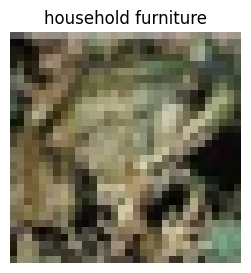

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to convert a tensor to a numpy image
def tensor_to_image(tensor):
    # Convert tensor to numpy array
    image = tensor.numpy()
    # Rescale the pixel values to be between 0 and 1
    image = image / 2 + 0.5
    # Reorder dimensions to (height, width, channels)
    image = np.transpose(image, (1, 2, 0))
    return image

# Function to display a single image
def show_image(image, label, classes):
    # Convert tensor to numpy array
    image = tensor_to_image(image)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(4, 3))

    # Plot the image
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(classes[label.item()])

    # Show the plot
    plt.show()

# Get a batch of images and labels
images, labels = next(iter(train_loader))

# Assuming you want to display the first image in the batch
image_to_display = images[0]
label_to_display = labels[0]

# Display the image
show_image(image_to_display, label_to_display, classes)

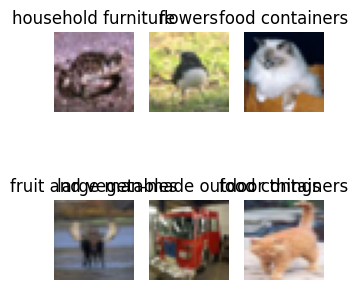

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

batch_size = 6

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Define the figure size
plt.figure(figsize=(3, 4))  # 6 columns and 4 rows

# Show images and print labels for the first 6 images
for i in range(batch_size):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns, i+1 denotes the position of the subplot
    imshow(torchvision.utils.make_grid(images[i]))
    plt.title(f"{classes[labels[i]]}")
    plt.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

## Define the model architecture

In [7]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x))) #This line applies the first convolutional layer (conv1) to the input x, then applies the ReLU activation function (torch.relu)
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8) #This line reshapes (flattens) the output tensor x from the previous layer to prepare it for the fully connected layers.
        x = torch.relu(self.fc1(x)) #This applies the ReLU activation function to the output of the first fully connected layer (fc1).
        x = self.fc2(x) #This applies the second fully connected layer (fc2) to produce the final output tensor x
        return x


In [8]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = SimpleCNN().to(device)

## Define a Loss function and optimizer.
Using a Classification Cross-Entropy loss and Adam with momentum.

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [10]:
num_epochs = 5
for epoch in range(num_epochs): # loop over the dataset multiple times
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader: # get the inputs; images.to(device), labels.to(device) is a list of [images, labels]
        images, labels = images.to(device), labels.to(device)  # Move data to GPU

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = correct_val / total_val

    # Print training and validation statistics
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}')

Epoch 1/5, Loss: 1.2811, Train Accuracy: 0.5382, Val Accuracy: 0.6171
Epoch 2/5, Loss: 0.9427, Train Accuracy: 0.6677, Val Accuracy: 0.6766
Epoch 3/5, Loss: 0.8045, Train Accuracy: 0.7170, Val Accuracy: 0.7004
Epoch 4/5, Loss: 0.7033, Train Accuracy: 0.7540, Val Accuracy: 0.7024
Epoch 5/5, Loss: 0.6213, Train Accuracy: 0.7820, Val Accuracy: 0.6889


##Saving our trained model

In [11]:
torch.save(model.state_dict(), 'cifar10_model.pth')

##Test the network on the test data
We have trained the network for 5 epoch over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

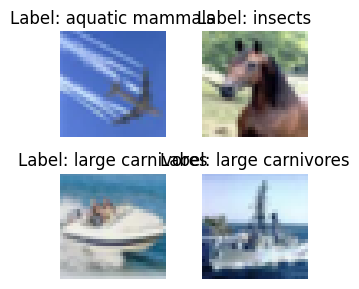

In [12]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
# Define the figure size
plt.figure(figsize=(3, 3))  # 3 columns and 4 rows

# Print images and labels for the first 4 images
for i in range(min(4, len(labels))):
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns, i+1 denotes the position of the subplot
    imshow(torchvision.utils.make_grid(images[i]))
    plt.title(f"Label: {classes[labels[i]]}")
    plt.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()


##Load the pre trained model

In [13]:
model.load_state_dict(torch.load('cifar10_model.pth'))

<All keys matched successfully>

In [14]:
# Assuming 'images' is your input tensor
images = images.to(device)  # 'device' is the GPU device, e.g., torch.device('cuda')

# Now perform the convolution operation
outputs = model(images)

In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  aquatic mammals insects large carnivores large carnivores


In [16]:
# Assuming 'images' is your input tensor and 'model' is your neural network model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the same device as the input tensor
model = model.to(device)

# Move the input tensor to the same device as the model
images = images.to(device)

# Now perform the forward pass
outputs = model(images)


In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        # Move the model to the same device as the input tensor
        model = model.to(device)

        # Move the input tensor to the same device as the model
        images = images.to(device)

        # Now perform the forward pass
        outputs = model(images)

        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)

        # Assuming 'labels' is your tensor containing the ground truth labels
        labels = labels.to(device)

        # Now you can perform the operation
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 68 %


In [18]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # Move the model to the device
        model = model.to(device)

        # Move the input tensor to the same device as the model
        images = images.to(device)

        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if classname in total_pred and total_pred[classname] > 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    else:
        print(f'No predictions made or no test samples for class: {classname}')

Accuracy for class: aquatic mammals is 70.7 %
Accuracy for class: fish  is 80.0 %
Accuracy for class: flowers is 58.8 %
Accuracy for class: food containers is 41.1 %
Accuracy for class: fruit and vegetables is 64.9 %
Accuracy for class: household electrical devices is 76.9 %
Accuracy for class: household furniture is 81.9 %
Accuracy for class: insects is 65.5 %
Accuracy for class: large carnivores is 74.7 %
Accuracy for class: large man-made outdoor things is 74.4 %
No predictions made or no test samples for class: large natural outdoor scenes
No predictions made or no test samples for class: large omnivores and herbivores
No predictions made or no test samples for class: medium-sized mammals
No predictions made or no test samples for class: non-insect invertebrates
No predictions made or no test samples for class: people
No predictions made or no test samples for class: reptiles
No predictions made or no test samples for class: small mammals
No predictions made or no test samples for 

##PGDRS attack

Original Label: 2


The image has not been attacked by an adversarial perturbation.


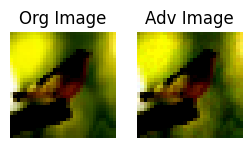

Original Prediction: flowers
Adversarial Prediction: flowers
Success Rate: 0.0


In [19]:
# Define the PGDRS attack
attack_PGDRS = torchattacks.PGDRS(model, eps=8/255, alpha=2/255, steps=10, noise_type="guassian", noise_sd=0.5, noise_batch_size=5, batch_max=2048)
# Choose a random data point from the test dataset
index_PGDRS = np.random.randint(0, len(test_dataset))
original_image_PGDRS, original_label_PGDRS = test_dataset[index_PGDRS]
print("Original Label:", original_label_PGDRS)

# Ensure original_label is a PyTorch tensor
original_label_tensor_PGDRS = torch.tensor(original_label_PGDRS)

# Apply the PGDRS attack to the original image
adv_images_PGDRS = attack_PGDRS(original_image_PGDRS.unsqueeze(0).cuda(), original_label_tensor_PGDRS.unsqueeze(0).cuda())

# Predictions on original and adversarial images
original_prediction_PGDRS = torch.argmax(model(original_image_PGDRS.unsqueeze(0).cuda()))
adversarial_prediction_PGDRS = torch.argmax(model(adv_images_PGDRS))

# Check if the predictions differ
if original_prediction_PGDRS != adversarial_prediction_PGDRS:
    print("The image has likely been attacked by an adversarial perturbation.")
else:
    print("The image has not been attacked by an adversarial perturbation.")

# Visualize the original image and adversarial image along with their predictions
fig, axs = plt.subplots(1, 2, figsize=(3, 5))

# Original image
axs[0].imshow(np.transpose(original_image_PGDRS.squeeze().detach().cpu().numpy(), (1, 2, 0)))
axs[0].set_title("Org Image")
axs[0].axis('off')

# Adversarial image
axs[1].imshow(np.transpose(adv_images_PGDRS.squeeze().detach().cpu().numpy(), (1, 2, 0)))
axs[1].set_title("Adv Image")
axs[1].axis('off')

plt.show()

# Print the original and adversarial predictions
print("Original Prediction:", classes[original_prediction_PGDRS.item()])
print("Adversarial Prediction:", classes[adversarial_prediction_PGDRS.item()])

# Initialize variables to count successful attacks
successful_attacks = 0
total_samples = len(test_dataset)

if original_prediction_PGDRS != adversarial_prediction_PGDRS:
    successful_attacks += 1

# Calculate the success rate
success_rate = successful_attacks / total_samples

# Print the success rate
print("Success Rate:", success_rate)

##SINIFGSM attack

Original Label: 5


The image has likely been attacked by an adversarial perturbation.


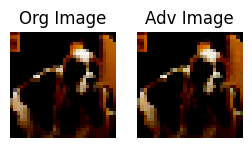

Original Prediction: household electrical devices
Adversarial Prediction: large carnivores
Success Rate: 0.0001


In [20]:
# Define the SINIFGSM attack
attack_SINIFGSM = torchattacks.SINIFGSM(model, eps=8/255, alpha=2/255, steps=10, decay=1.0, m=5)
# Choose a random data point from the test dataset
index_SINIFGSM = np.random.randint(0, len(test_dataset))
original_image_SINIFGSM, original_label_SINIFGSM = test_dataset[index_SINIFGSM]
print("Original Label:", original_label_SINIFGSM)

# Ensure original_label is a PyTorch tensor
original_label_tensor_SINIFGSM = torch.tensor(original_label_SINIFGSM)

# Apply the SINIFGSM attack to the original image
adv_images_SINIFGSM = attack_SINIFGSM(original_image_SINIFGSM.unsqueeze(0).cuda(), original_label_tensor_SINIFGSM.unsqueeze(0).cuda())

# Predictions on original and adversarial images
original_prediction_SINIFGSM = torch.argmax(model(original_image_SINIFGSM.unsqueeze(0).cuda()))
adversarial_prediction_SINIFGSM = torch.argmax(model(adv_images_SINIFGSM))

# Check if the predictions differ
if original_prediction_SINIFGSM != adversarial_prediction_SINIFGSM:
    print("The image has likely been attacked by an adversarial perturbation.")
else:
    print("The image has not been attacked by an adversarial perturbation.")

# Visualize the original image and adversarial image along with their predictions
fig, axs = plt.subplots(1, 2, figsize=(3, 5))

# Original image
axs[0].imshow(np.transpose(original_image_SINIFGSM.squeeze().detach().cpu().numpy(), (1, 2, 0)))
axs[0].set_title("Org Image")
axs[0].axis('off')

# Adversarial image
axs[1].imshow(np.transpose(adv_images_SINIFGSM.squeeze().detach().cpu().numpy(), (1, 2, 0)))
axs[1].set_title("Adv Image")
axs[1].axis('off')

plt.show()

# Print the original and adversarial predictions
print("Original Prediction:", classes[original_prediction_SINIFGSM.item()])
print("Adversarial Prediction:", classes[adversarial_prediction_SINIFGSM.item()])

# Initialize variables to count successful attacks
successful_attacks = 0
total_samples = len(test_dataset)

if original_prediction_SINIFGSM != adversarial_prediction_SINIFGSM:
    successful_attacks += 1

# Calculate the success rate
success_rate = successful_attacks / total_samples

# Print the success rate
print("Success Rate:", success_rate)

##VMIFGSM attack

Original Label: 4


The image has likely been attacked by an adversarial perturbation.


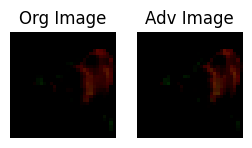

Original Prediction: fruit and vegetables
Adversarial Prediction: aquatic mammals
Success Rate: 0.0001


In [21]:
# Define the VMIFGSM attack
attack_VMIFGSM = torchattacks.VMIFGSM(model, eps=8/255, alpha=2/255, steps=10, decay=1.0, N=5, beta=3/2)
# Choose a random data point from the test dataset
index_VMIFGSM = np.random.randint(0, len(test_dataset))
original_image_VMIFGSM, original_label_VMIFGSM = test_dataset[index_VMIFGSM]
print("Original Label:", original_label_VMIFGSM)

# Ensure original_label is a PyTorch tensor
original_label_tensor_VMIFGSM = torch.tensor(original_label_VMIFGSM)

# Apply the VMIFGSM attack to the original image
adv_images_VMIFGSM = attack_VMIFGSM(original_image_VMIFGSM.unsqueeze(0).cuda(), original_label_tensor_VMIFGSM.unsqueeze(0).cuda())

# Predictions on original and adversarial images
original_prediction_VMIFGSM = torch.argmax(model(original_image_VMIFGSM.unsqueeze(0).cuda()))
adversarial_prediction_VMIFGSM = torch.argmax(model(adv_images_VMIFGSM))

# Check if the predictions differ
if original_prediction_VMIFGSM != adversarial_prediction_VMIFGSM:
    print("The image has likely been attacked by an adversarial perturbation.")
else:
    print("The image has not been attacked by an adversarial perturbation.")

# Visualize the original image and adversarial image along with their predictions
fig, axs = plt.subplots(1, 2, figsize=(3, 5))

# Original image
axs[0].imshow(np.transpose(original_image_VMIFGSM.squeeze().detach().cpu().numpy(), (1, 2, 0)))
axs[0].set_title("Org Image")
axs[0].axis('off')

# Adversarial image
axs[1].imshow(np.transpose(adv_images_VMIFGSM.squeeze().detach().cpu().numpy(), (1, 2, 0)))
axs[1].set_title("Adv Image")
axs[1].axis('off')

plt.show()

# Print the original and adversarial predictions
print("Original Prediction:", classes[original_prediction_VMIFGSM.item()])
print("Adversarial Prediction:", classes[adversarial_prediction_VMIFGSM.item()])

# Initialize variables to count successful attacks
successful_attacks = 0
total_samples = len(test_dataset)

if original_prediction_VMIFGSM != adversarial_prediction_VMIFGSM:
    successful_attacks += 1

# Calculate the success rate
success_rate = successful_attacks / total_samples

# Print the success rate
print("Success Rate:", success_rate)

##VNIFGSM attack

Original Label: 8
The image has likely been attacked by an adversarial perturbation.


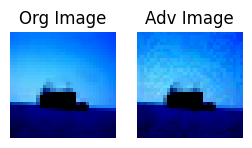

Original Prediction: large carnivores
Adversarial Prediction: flowers
Success Rate: 0.0001


In [24]:
# Define the VNIFGSM attack
attack_VNIFGSM = torchattacks.VNIFGSM(model, eps=8/255, alpha=2/255, steps=10, decay=1.0, N=5, beta=3/2)
# Choose a random data point from the test dataset
index_VNIFGSM = np.random.randint(0, len(test_dataset))
original_image_VNIFGSM, original_label_VNIFGSM = test_dataset[index_VNIFGSM]
print("Original Label:", original_label_VNIFGSM)

# Ensure original_label is a PyTorch tensor
original_label_tensor_VNIFGSM = torch.tensor(original_label_VNIFGSM)

# Apply the VNIFGSM attack to the original image
adv_images_VNIFGSM = attack_VNIFGSM(original_image_VNIFGSM.unsqueeze(0).cuda(), original_label_tensor_VNIFGSM.unsqueeze(0).cuda())

# Predictions on original and adversarial images
original_prediction_VNIFGSM = torch.argmax(model(original_image_VNIFGSM.unsqueeze(0).cuda()))
adversarial_prediction_VNIFGSM = torch.argmax(model(adv_images_VNIFGSM))

# Check if the predictions differ
if original_prediction_VNIFGSM != adversarial_prediction_VNIFGSM:
    print("The image has likely been attacked by an adversarial perturbation.")
else:
    print("The image has not been attacked by an adversarial perturbation.")

# Visualize the original image and adversarial image along with their predictions
fig, axs = plt.subplots(1, 2, figsize=(3, 5))

# Original image
axs[0].imshow(np.transpose(original_image_VNIFGSM.squeeze().detach().cpu().numpy(), (1, 2, 0)))
axs[0].set_title("Org Image")
axs[0].axis('off')

# Adversarial image
axs[1].imshow(np.transpose(adv_images_VNIFGSM.squeeze().detach().cpu().numpy(), (1, 2, 0)))
axs[1].set_title("Adv Image")
axs[1].axis('off')

plt.show()

# Print the original and adversarial predictions
print("Original Prediction:", classes[original_prediction_VNIFGSM.item()])
print("Adversarial Prediction:", classes[adversarial_prediction_VNIFGSM.item()])

# Initialize variables to count successful attacks
successful_attacks = 0
total_samples = len(test_dataset)

if original_prediction_VNIFGSM != adversarial_prediction_VNIFGSM:
    successful_attacks += 1

# Calculate the success rate
success_rate = successful_attacks / total_samples

# Print the success rate
print("Success Rate:", success_rate)

##Comparing all attacks

In [25]:
# Define the PGDRS attack
attack_PGDRS = torchattacks.PGDRS(model, eps=8/255, alpha=2/255, steps=10, noise_type="guassian", noise_sd=0.5, noise_batch_size=5, batch_max=2048)
# Define the SINIFGSM attack
attack_SINIFGSM = torchattacks.SINIFGSM(model, eps=8/255, alpha=2/255, steps=10, decay=1.0, m=5)
# Define the VMIFGSM attack
attack_VMIFGSM = torchattacks.VMIFGSM(model, eps=8/255, alpha=2/255, steps=10, decay=1.0, N=5, beta=3/2)
# Define the VNIFGSM attack
attack_VNIFGSM = torchattacks.VNIFGSM(model, eps=8/255, alpha=2/255, steps=10, decay=1.0, N=5, beta=3/2)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Initialize variables to count successful attacks
successful_attacks_PGDRS = 0
successful_attacks_SINIFGSM = 0
successful_attacks_VMIFGSM = 0
successful_attacks_VNIFGSM = 0

total_samples = len(test_dataset)

# Iterate over the test dataset
for original_image, original_label in test_dataset:
    # Ensure original_label is a PyTorch tensor
    original_label_tensor = torch.tensor(original_label)
    original_image = original_image.to(device)

    # Apply the PGDRS attack to the original image
    adv_images_PGDRS = attack_PGDRS(original_image.unsqueeze(0), original_label_tensor.unsqueeze(0))
    # Apply the SINIFGSM attack to the original image
    adv_images_SINIFGSM = attack_SINIFGSM(original_image.unsqueeze(0), original_label_tensor.unsqueeze(0))
    # Apply the VMIFGSM attack to the original image
    adv_images_VMIFGSM = attack_VMIFGSM(original_image.unsqueeze(0), original_label_tensor.unsqueeze(0))
    # Apply the VNIFGSM attack to the original image
    adv_images_VNIFGSM = attack_VNIFGSM(original_image.unsqueeze(0), original_label_tensor.unsqueeze(0))

    # Predictions on original and adversarial images
    original_prediction = torch.argmax(model(original_image.unsqueeze(0)))
    adversarial_prediction_PGDRS = torch.argmax(model(adv_images_PGDRS))
    adversarial_prediction_SINIFGSM = torch.argmax(model(adv_images_SINIFGSM))
    adversarial_prediction_VMIFGSM = torch.argmax(model(adv_images_VMIFGSM))
    adversarial_prediction_VNIFGSM = torch.argmax(model(adv_images_VNIFGSM))

    # Check if the predictions differ for PGDRS attack
    if original_prediction != adversarial_prediction_PGDRS:
        successful_attacks_PGDRS += 1

    # Check if the predictions differ for SINIFGSM attack
    if original_prediction != adversarial_prediction_SINIFGSM:
        successful_attacks_SINIFGSM += 1

    # Check if the predictions differ for VMIFGSM attack
    if original_prediction != adversarial_prediction_VMIFGSM:
        successful_attacks_VMIFGSM += 1

    # Check if the predictions differ for VNIFGSM attack
    if original_prediction != adversarial_prediction_VNIFGSM:
        successful_attacks_VNIFGSM += 1

# Calculate the success rate for each attack
success_rate_PGDRS = successful_attacks_PGDRS / total_samples
success_rate_SINIFGSM = successful_attacks_SINIFGSM / total_samples
success_rate_VMIFGSM = successful_attacks_VMIFGSM / total_samples
success_rate_VNIFGSM = successful_attacks_VNIFGSM / total_samples

# Print the success rates for each attack
print("PGDRS Success Rate:", success_rate_PGDRS)
print("SINIFGSM Success Rate:", success_rate_SINIFGSM)
print("VMIFGSM Success Rate:", success_rate_VMIFGSM)
print("VNIFGSM Success Rate:", success_rate_VNIFGSM)

# Compare which attack has the highest success rate
highest_success_rate = max(success_rate_PGDRS, success_rate_SINIFGSM, success_rate_VMIFGSM, success_rate_VNIFGSM)
if highest_success_rate == success_rate_PGDRS:
    print("PGDRS has the highest success rate.")
elif highest_success_rate == success_rate_SINIFGSM:
    print("SINIFGSM has the highest success rate.")
elif highest_success_rate == success_rate_VMIFGSM:
    print("VMIFGSM has the highest success rate.")
else:
    print("VNIFGSM has the highest success rate.")

PGDRS Success Rate: 0.6182
SINIFGSM Success Rate: 0.8053
VMIFGSM Success Rate: 0.8441
VNIFGSM Success Rate: 0.8365
VMIFGSM has the highest success rate.
